## 导入CSV数据

In [1]:
import numpy as np
import pandas as pd
from random import shuffle
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from pandas import set_option
from sklearn.preprocessing import StandardScaler #正态化数据
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV #网格优化搜索参数 模块
from sklearn.metrics import  accuracy_score      #准确率评分

from sklearn.pipeline import Pipeline            #自动化处理 函数
#分类算法 函数
from sklearn.linear_model import LogisticRegression#导入逻辑回归模型
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB       #符合高斯分布的朴素贝叶斯
from sklearn.svm import SVC
diab=pd.read_csv(r'C:\Users\dell\Desktop\Python_project\ZYD366\diabetes.csv')
names = {'Pregnancies':'preg','DiabetesPedigreeFunction':'DPF',
         'BloodPressure':'pres','SkinThickness':'skin','Outcome':'class'}
diab.rename(columns = names, inplace = True)     #重命名列
diab_1 = diab.copy()                             #建立数据副本
print(round(diab.describe().T,3))                #print数据的描述统计量
diab


         count     mean      std     min     25%      50%      75%     max
preg     768.0    3.845    3.370   0.000   1.000    3.000    6.000   17.00
Glucose  768.0  120.895   31.973   0.000  99.000  117.000  140.250  199.00
pres     768.0   69.105   19.356   0.000  62.000   72.000   80.000  122.00
skin     768.0   20.536   15.952   0.000   0.000   23.000   32.000   99.00
Insulin  768.0   79.799  115.244   0.000   0.000   30.500  127.250  846.00
BMI      768.0   31.993    7.884   0.000  27.300   32.000   36.600   67.10
DPF      768.0    0.472    0.331   0.078   0.244    0.372    0.626    2.42
Age      768.0   33.241   11.760  21.000  24.000   29.000   41.000   81.00
class    768.0    0.349    0.477   0.000   0.000    0.000    1.000    1.00


,preg,Glucose,pres,skin,Insulin,BMI,DPF,Age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## 删除异常值

In [3]:
diab = diab.drop(diab[diab.Glucose==0].index)
diab = diab.drop(diab[diab.pres==0].index)
diab

,preg,Glucose,pres,skin,Insulin,BMI,DPF,Age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## 检查数据中是否存在缺失值

In [4]:
diab.isnull().any(axis=0)    #检查数据中是否存在缺失值

preg       False
Glucose    False
pres       False
skin       False
Insulin    False
BMI        False
DPF        False
Age        False
class      False
dtype: bool

## 数据可视化

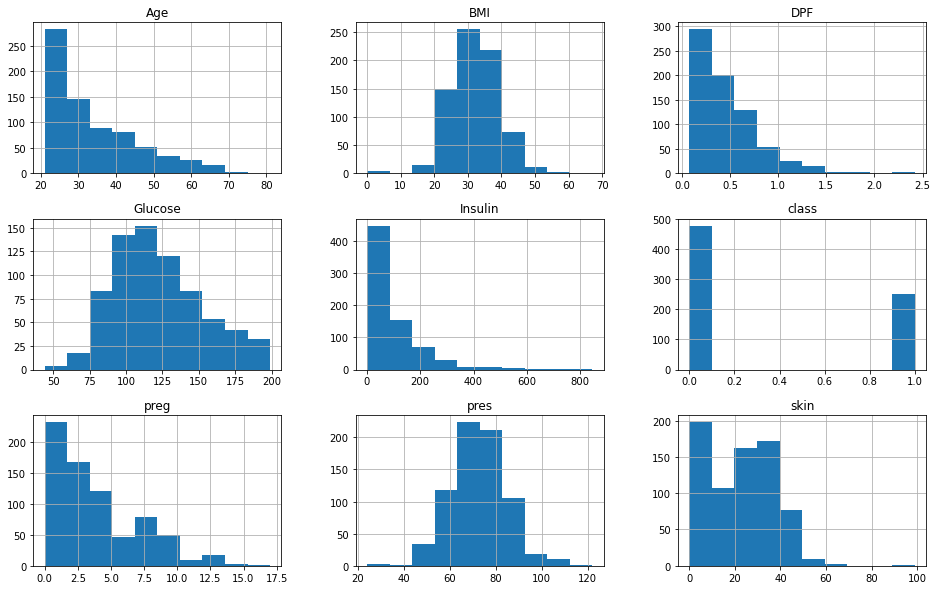

In [5]:
diab.hist(figsize=(16,10))#可视化（定义长宽）
plt.show()

(768, 9)


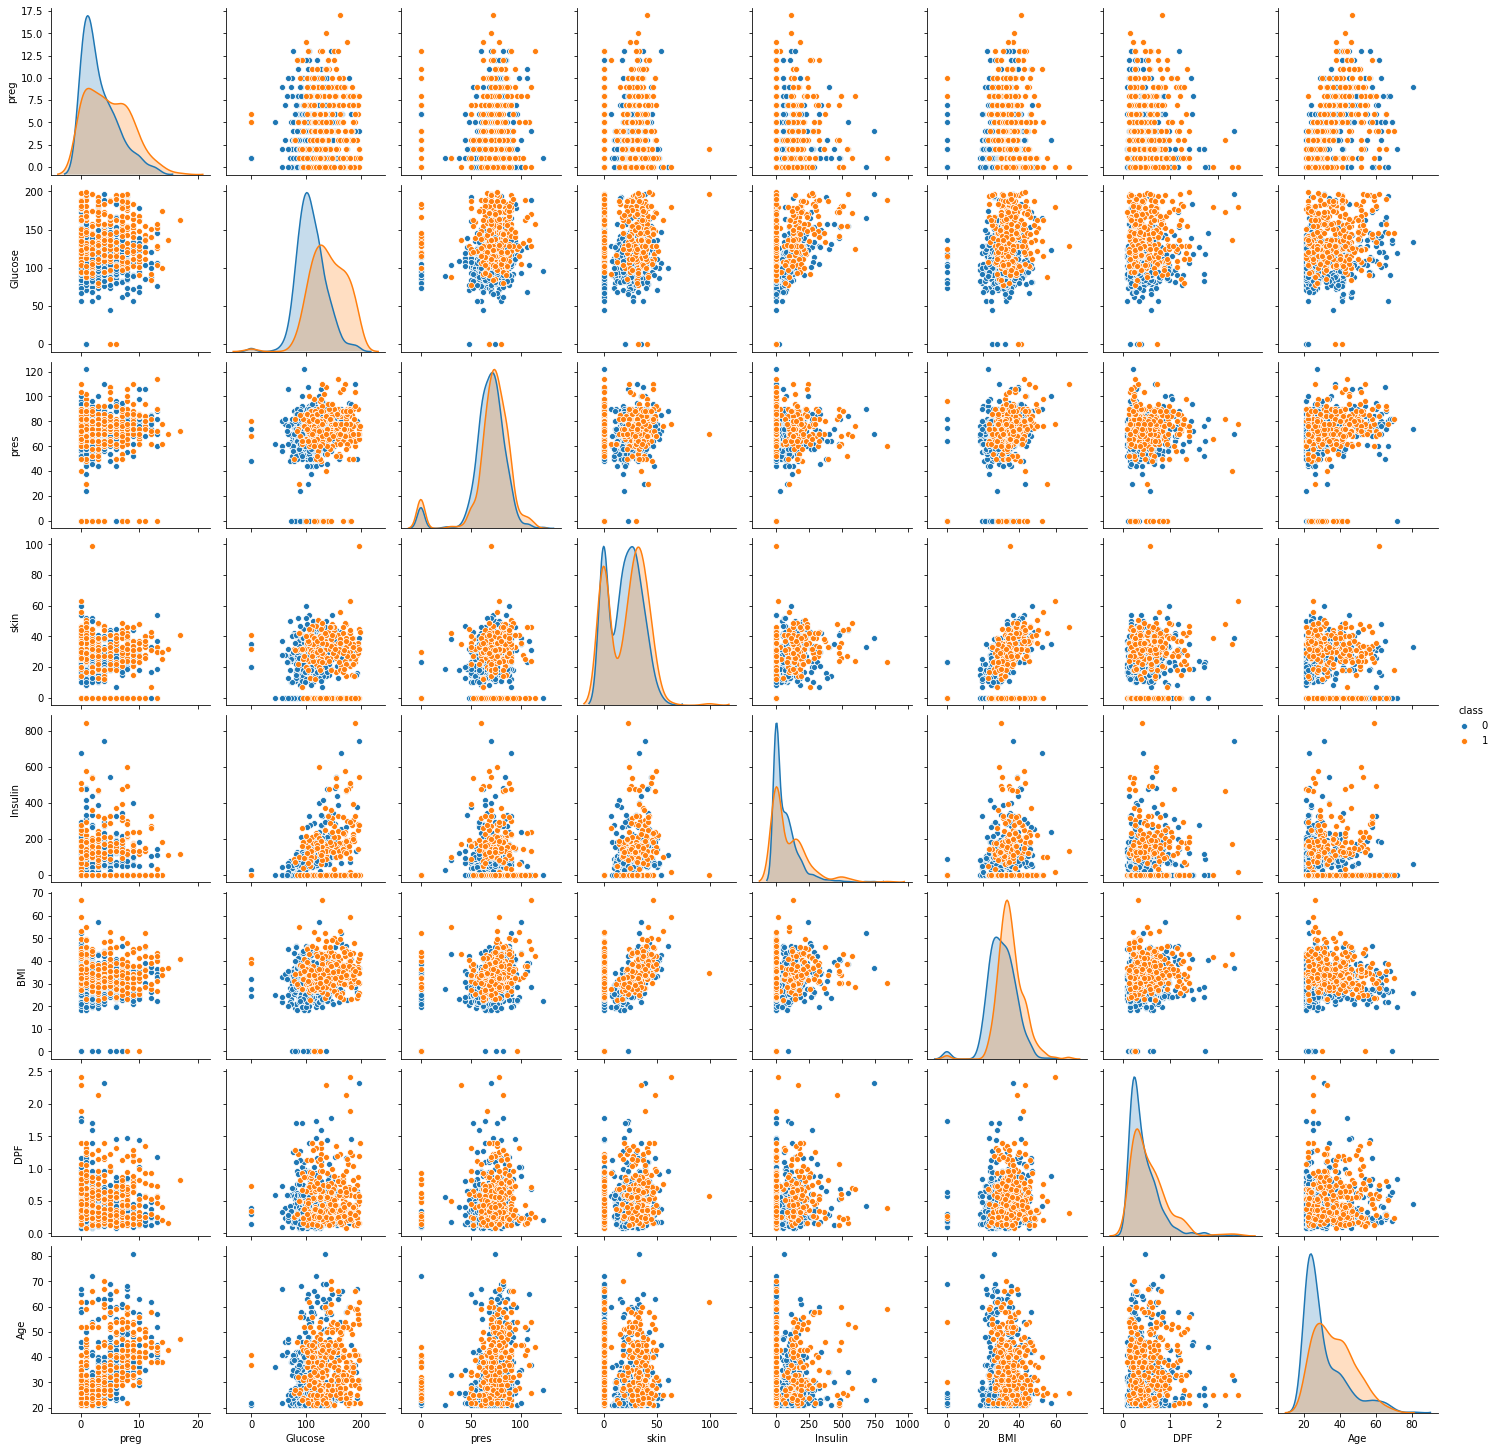

In [6]:
import seaborn as sns
print(diab_1.shape)
sns.pairplot(diab_1,vars=diab_1.columns[:-1],hue='class')#建立散点矩阵
plt.show()

## 建立训练数据集

In [7]:
array = diab.values  # 获取值
X = array[:, 0:8]  # 读取下标从0-7列的数据 
print(X)
Y = array[:, 8]  # 读取列下标所在行数据
print(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state = 7)

[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]
[1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1.
 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0.
 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0.
 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1.
 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0.
 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0.
 1. 0. 

## 评估算法的基准

In [8]:
num_fold = 10
seed = 7
scoring = 'accuracy'

## 创建模型字典并实例

In [9]:
modes = {}
modes['LR'] = LogisticRegression()
modes['KNN'] = KNeighborsClassifier()
modes['Tree'] = DecisionTreeClassifier()
modes['NB'] = GaussianNB()
modes['SVM'] = SVC()

In [10]:
results = []
for key in modes:
    kfold = KFold(n_splits=num_fold,random_state=seed)
    cv_results = cross_val_score(modes[key],X_train,Y_train,cv=kfold,scoring=scoring)
    results.append(cv_results)
    print('{0}算法{1:.2%},标准方差:{2:.2f}'.format(key,cv_results.mean(),cv_results.std()))

C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number o

LR算法77.17%,标准方差:0.05
KNN算法71.48%,标准方差:0.05
Tree算法66.65%,标准方差:0.06
NB算法75.78%,标准方差:0.06
SVM算法75.60%,标准方差:0.05


C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should lea

## 算法参数调参

In [11]:
#(网格搜索优化参数、随机搜索优化参数)
#KNN算法调参
scaler = StandardScaler().fit(X_train)
rescalerX = scaler.transform(X_train)
param_grid = {'n_neighbors':[1,3,5,7,9,11,13,15,17,19,21,22]}
model = KNeighborsClassifier()
kfold = KFold(n_splits=num_fold,random_state=seed)
grid = GridSearchCV(estimator=model,param_grid=param_grid,scoring=scoring,cv=kfold)
grid_reslut = grid.fit(X=rescalerX,y=Y_train)

print("最好模型准确率：{0:.2%},参数是：{1}".format(grid_reslut.best_score_,grid_reslut.best_params_))

cv_results = zip(grid_reslut.cv_results_['mean_test_score'],
grid_reslut.cv_results_['std_test_score'],
grid_reslut.cv_results_['params'])

for mean,std,param in cv_results:
    print('算法准确率{0:.2%},标准方差:{1:.2f},参数:{2}'.format(mean,std,param))

C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


最好模型准确率：76.11%,参数是：{'n_neighbors': 15}
算法准确率67.69%,标准方差:0.07,参数:{'n_neighbors': 1}
算法准确率70.44%,标准方差:0.07,参数:{'n_neighbors': 3}
算法准确率72.68%,标准方差:0.07,参数:{'n_neighbors': 5}
算法准确率74.22%,标准方差:0.07,参数:{'n_neighbors': 7}
算法准确率73.72%,标准方差:0.06,参数:{'n_neighbors': 9}
算法准确率75.61%,标准方差:0.05,参数:{'n_neighbors': 11}
算法准确率75.43%,标准方差:0.05,参数:{'n_neighbors': 13}
算法准确率76.11%,标准方差:0.04,参数:{'n_neighbors': 15}
算法准确率74.58%,标准方差:0.05,参数:{'n_neighbors': 17}
算法准确率74.40%,标准方差:0.05,参数:{'n_neighbors': 19}
算法准确率74.75%,标准方差:0.05,参数:{'n_neighbors': 21}
算法准确率74.40%,标准方差:0.05,参数:{'n_neighbors': 22}


In [12]:
#支持向量机调参（C（惩罚系数）、kernel内核函数）
scaler = StandardScaler().fit(X_train)

rescalerX = scaler.transform(X_train).astype(float)
param_grid = {}

param_grid['C'] = [0.1,0.2,0.3,0.4,0.5,0.7,0.9,1.0,1.3,1.5,1.7,2.0]
param_grid['kernel'] = ['linear','poly','rbf','sigmoid']

model = SVC()

kflod = KFold(n_splits=num_fold,random_state=seed)
grid = GridSearchCV(estimator=model,param_grid=param_grid,scoring=scoring,cv=kflod)

grid_reslut = grid.fit(X=rescalerX,y=Y_train)

print('最优的准确率：{0:.2%},最优的参数:{1}'.format(grid_reslut.best_score_,grid_reslut.best_params_))

cv_results = zip(grid_reslut.cv_results_['mean_test_score'],
grid_reslut.cv_results_['std_test_score'],
grid_reslut.cv_results_['params'])

for mean,std,param in cv_results:
    print('准确率:{0:.2%},标准方差:{1:.2f},参数:{2}'.format(mean,std,param))

C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


最优的准确率：76.64%,最优的参数:{'C': 0.1, 'kernel': 'sigmoid'}
准确率:76.47%,标准方差:0.06,参数:{'C': 0.1, 'kernel': 'linear'}
准确率:69.76%,标准方差:0.07,参数:{'C': 0.1, 'kernel': 'poly'}
准确率:75.95%,标准方差:0.06,参数:{'C': 0.1, 'kernel': 'rbf'}
准确率:76.64%,标准方差:0.05,参数:{'C': 0.1, 'kernel': 'sigmoid'}
准确率:76.30%,标准方差:0.06,参数:{'C': 0.2, 'kernel': 'linear'}
准确率:71.31%,标准方差:0.06,参数:{'C': 0.2, 'kernel': 'poly'}
准确率:75.79%,标准方差:0.06,参数:{'C': 0.2, 'kernel': 'rbf'}
准确率:75.44%,标准方差:0.06,参数:{'C': 0.2, 'kernel': 'sigmoid'}
准确率:76.30%,标准方差:0.06,参数:{'C': 0.3, 'kernel': 'linear'}
准确率:72.33%,标准方差:0.05,参数:{'C': 0.3, 'kernel': 'poly'}
准确率:75.96%,标准方差:0.05,参数:{'C': 0.3, 'kernel': 'rbf'}
准确率:75.25%,标准方差:0.06,参数:{'C': 0.3, 'kernel': 'sigmoid'}
准确率:76.30%,标准方差:0.06,参数:{'C': 0.4, 'kernel': 'linear'}
准确率:72.50%,标准方差:0.05,参数:{'C': 0.4, 'kernel': 'poly'}
准确率:75.62%,标准方差:0.05,参数:{'C': 0.4, 'kernel': 'rbf'}
准确率:74.57%,标准方差:0.05,参数:{'C': 0.4, 'kernel': 'sigmoid'}
准确率:76.47%,标准方差:0.06,参数:{'C': 0.5, 'kernel': 'linear'}
准确率:72.85%,标准方差:0.05,参数:{'C':

## 确定最终模型

In [14]:
scaler = StandardScaler().fit(X_train)
rescalerX = scaler.transform(X_train)
model = SVC(C=0.7,kernel='linear')
model.fit(X=rescalerX,y=Y_train)

#评估模型（验证集数据）
rescaler_test_X = scaler.transform(X_test)
predictions = model.predict(rescaler_test_X)
print('准确率：{0}'.format(accuracy_score(Y_test,predictions)))
print(confusion_matrix(Y_test,predictions))
print(classification_report(Y_test,predictions))

准确率：0.7876712328767124
[[94 10]
 [21 21]]
              precision    recall  f1-score   support

         0.0       0.82      0.90      0.86       104
         1.0       0.68      0.50      0.58        42

    accuracy                           0.79       146
   macro avg       0.75      0.70      0.72       146
weighted avg       0.78      0.79      0.78       146

